In [1]:
import torch
import numpy as np
import pandas as pd
from PIL import Image
import sys
sys.path.append('local_models/natural-language-joint-query-search') # modified clip
sys.path.append('local_models')
from CLIP.clip import clip
from CLIP.clip import model
import matplotlib.pyplot as plt
from Attention_visualizer.attention_visualizer import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

In [3]:
def extract_attention_features(image_path, text):
    image = Image.open(image_path)  
    search_query = text
    with torch.no_grad():
        text_token = clip.tokenize(search_query).to(device)
        text_encoded, weight = model.encode_text(text_token)
        text_encoded /= text_encoded.norm(dim=-1, keepdim=True)
    text_features = text_encoded.cpu().numpy()
    
    with torch.no_grad():
        image_features = model.encode_image(preprocess(image).unsqueeze(0).to(device))
        
    sentence = search_query.split(" ")
    attention_weights = list(weight[-1][0][1+len(sentence)].cpu().numpy())[:2+len(sentence)][1:][:-1]
    attention_weights = [float(item) for item in attention_weights]
    display_attention(sentence, attention_weights, scale=1, offset=20, style=1)
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.show()
    return image_features, text_features, attention_weights

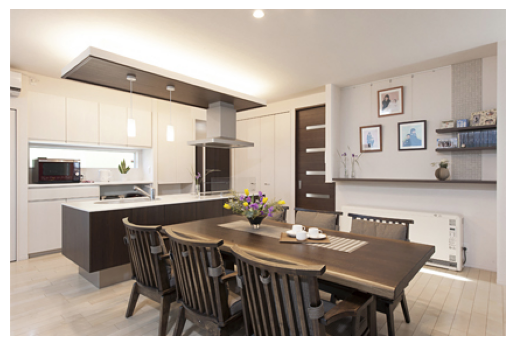

In [4]:
image_path = '2022年度_修論引継資料_下村隼生/子育て世帯向け住宅の供給側分析/内観特徴分析/scraping_images/A_大和ハウス工業/no_human/A_20_7.jpg'
text = "There are dark color table and chairs with a open kitchen in a living room"
image_features, text_features, attention_weights = extract_attention_features(image_path, text)

In [10]:
# print(image_features)
# print(text_features)
print([f'{i*100:.2f}' for i in attention_weights])
print([w for w in text.split()])

['0.42', '0.32', '3.55', '2.56', '5.76', '3.57', '9.48', '4.40', '1.04', '2.13', '4.67', '2.53', '0.60', '1.18', '6.40']
['There', 'are', 'dark', 'color', 'table', 'and', 'chairs', 'with', 'a', 'open', 'kitchen', 'in', 'a', 'living', 'room']
